This is a python implementation of Chapter 5 in [P. Shirley, Ray Tracing in One Weekend](https://raytracing.github.io/books/RayTracingInOneWeekend.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/nvladim/Documents/GitHub/ray_tracer/weekend_shirley')
from tracing import *

In [2]:
def color(ray: Ray, surf: Surface) -> Vec3:
    rec = HitRecord()
    # object colour based on hit normal position
    if surf.hit(ray, 0, sys.float_info.max, rec):
        return 0.5 * (rec.normal + 1)
    else:  # background color
        unit_direction = ray.dir.normalize()
        t = 0.5 * (unit_direction.e[1] + 1)
        return (1 - t) * Vec3(1, 1, 1) + t * Vec3(0.5, 0.7, 1)

In [3]:
nx, ny = 200, 100
scene = np.empty((ny, nx, 3), int)
lower_left_corner = Vec3(-2, -1, -1)
horizontal = Vec3(4, 0, 0)
vertical = Vec3(0, 2, 0)
origin = Vec3(0, 0, 0)
world = SurfaceList([Sphere(Vec3(0, 0, -1), 0.5),
                     Sphere(Vec3(0, -100.5, -1), 100)])

for j in range(ny):
    for i in range(nx):
        u = float(i) / nx
        v = float(j) / ny
        ray = Ray(origin, lower_left_corner + u * horizontal + v * vertical)
        col = color(ray, world)
        scene[j, i, :] = (255.99 * col.e).astype(int)

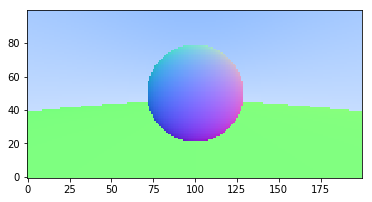

In [4]:
plt.imshow(scene, origin='lower')